In [22]:
#Se importan las librerias + carga de Dataset sacado de Kaggle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#Carga de Datos
df = pd.read_csv('student_lifestyle_dataset..csv')

# 2. Diccionario de traducción para traducir las Columnas
traduccion_columnas = {
    'Student_ID': 'ID_Estudiante',
    'Study_Hours_Per_Day': 'Horas_Estudio',
    'Extracurricular_Hours_Per_Day': 'Horas_Extracurriculares',
    'Sleep_Hours_Per_Day': 'Horas_Sueno',
    'Social_Hours_Per_Day': 'Horas_Sociales',
    'Physical_Activity_Hours_Per_Day': 'Horas_Actividad_Fisica',
    'Stress_Level': 'Nivel_Estres',
    'Gender': 'Genero',
    'Grades': 'Calificaciones'
}

# Aplicar el cambio de nombre
df.rename(columns=traduccion_columnas, inplace=True)

#  Traducir los Valores de las celdas
df['Genero'] = df['Genero'].replace({'Male': 'Masculino', 'Female': 'Femenino'})
df['Nivel_Estres'] = df['Nivel_Estres'].replace({'Low': 'Bajo', 'Moderate': 'Moderado', 'High': 'Alto'})

#Muestra de dataset
display(df)
#Busqueda de Nan
df.info()
#Estadisticas Dataset
df.describe()


,ID_Estudiante,Horas_Estudio,Horas_Extracurriculares,Horas_Sueno,Horas_Sociales,Horas_Actividad_Fisica,Nivel_Estres,Genero,Calificaciones
0,1,6.9,3.8,8.7,2.8,1.8,Moderado,Masculino,7.48
1,2,5.3,3.5,8.0,4.2,3.0,Bajo,Femenino,6.88
2,3,5.1,3.9,9.2,1.2,4.6,Bajo,Masculino,6.68
3,4,6.5,2.1,7.2,1.7,6.5,Moderado,Masculino,7.20
4,5,8.1,0.6,6.5,2.2,6.6,Alto,Masculino,8.78
...,...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,Moderado,Masculino,8.30
1996,1997,6.3,2.8,8.8,1.5,4.6,Moderado,Femenino,6.62
1997,1998,6.2,0.0,6.2,0.8,10.8,Moderado,Masculino,7.85
1998,1999,8.1,0.7,7.6,3.5,4.1,Alto,Masculino,7.60


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Estudiante            2000 non-null   int64  
 1   Horas_Estudio            2000 non-null   float64
 2   Horas_Extracurriculares  2000 non-null   float64
 3   Horas_Sueno              2000 non-null   float64
 4   Horas_Sociales           2000 non-null   float64
 5   Horas_Actividad_Fisica   2000 non-null   float64
 6   Nivel_Estres             2000 non-null   object 
 7   Genero                   2000 non-null   object 
 8   Calificaciones           2000 non-null   float64
dtypes: float64(6), int64(1), object(2)
memory usage: 140.8+ KB


,ID_Estudiante,Horas_Estudio,Horas_Extracurriculares,Horas_Sueno,Horas_Sociales,Horas_Actividad_Fisica,Calificaciones
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,1000.500000,7.475800,1.990100,7.501250,2.704550,4.32830,7.789825
std,577.494589,1.423888,1.155855,1.460949,1.688514,2.51411,0.746777
min,1.000000,5.000000,0.000000,5.000000,0.000000,0.00000,5.600000
25%,500.750000,6.300000,1.000000,6.200000,1.200000,2.40000,7.250000
50%,1000.500000,7.400000,2.000000,7.500000,2.600000,4.10000,7.780000
75%,1500.250000,8.700000,3.000000,8.800000,4.100000,6.10000,8.320000
max,2000.000000,10.000000,4.000000,10.000000,6.000000,13.00000,10.000000


# Lección 1

**Definición del Problema**

**Problema:** Comoinfluyen las horas de sueño y la actividad física en el promedio académico de los estudiantes universitarios?

**Formulación de Hipótesis**
Hipótesis Nula (H0): Los hábitos de horas de sueño y actividad física no tienen un efecto significativo sobre las calificaciones de los estudiantes

Hipótesis Alternativa (H1): Los estudiantes con mejores hábitos de sueño y mayor actividad física presentan calificaciones significativamente más altas que aquellos sin estos habitos.

**Identificación de Variables:**

Variable Cuantitativa Continua: Horas_Sueno y Calificaciones.

Variable Cualitativa Nominal: Genero.

Variable Cualitativa Ordinal: Nivel_Estres.

**Enfoque del Método Científico**


El estudio sigue un enfoque cuantitativo y deductivo.

Observación: Se utiliza un dataset llamado student_lifestyle_dataset. de 2,000 registros de estudiantes.

Deducción: A partir de la teoría de salud, suponemos que el descanso mejora la cognición.

Verificación: Utilizaremos estadística inferencial (Pruebas de hipótesis y p-valor) para validar si los datos respaldan nuestra teoría.

**Alcance**

El alcance es descriptivo porque caracteriza los hábitos saludables de los estudiantes, y explicativo en la medida que busca determinar si existen diferencias o asociaciones estadísticamente significativas entre variables como horas de sueño y rendimiento académico.

**Justificación de variables**

Las variables seleccionadas (horas de sueño, frecuencia de actividad física, tipo de alimentación, nivel de estrés) fueron elegidas peso como determinantes clave del bienestar físico y mental en población universitaria.

# Análisis Descriptivo Preliminar

 Resumen Estadístico de la Población de Estudio:


,mean,std,min,max,Rango
Horas_Sueno,7.501250,1.460949,5.0,10.0,5.0
Horas_Actividad_Fisica,4.328300,2.514110,0.0,13.0,13.0
Calificaciones,7.789825,0.746777,5.6,10.0,4.4


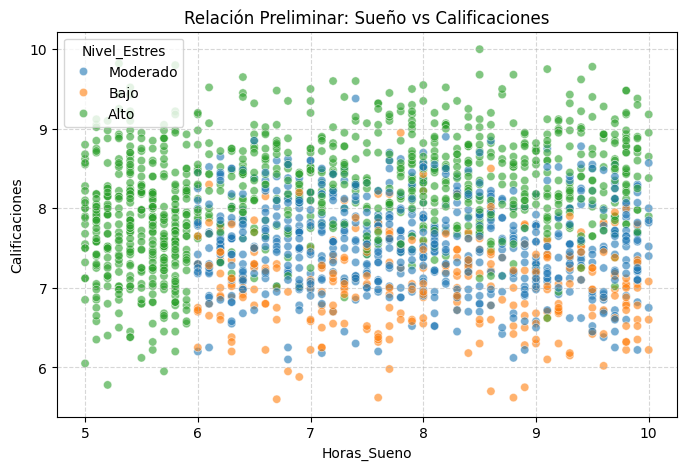

In [11]:
# Estadísticas descriptivas de las variables clave
resumen = df[['Horas_Sueno', 'Horas_Actividad_Fisica', 'Calificaciones']].describe().T
resumen['Rango'] = resumen['max'] - resumen['min']

print(" Resumen Estadístico de la Población de Estudio:")
display(resumen[['mean', 'std', 'min', 'max', 'Rango']])

# Visualización inicial de la relación clave (Sueño vs Calificaciones)

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Horas_Sueno', y='Calificaciones', hue='Nivel_Estres', alpha=0.6)
plt.title('Relación Preliminar: Sueño vs Calificaciones')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# La Lección 2 Probabilidad y estadística

**Plan de Muestreo**

Tipo de Muestreo: Se aplica un Muestreo Aleatorio Simple (MAS).

Justificación: Contamos con una base de datos de 2,000 registros. Cada registro representa un estudiante con identificador único (ID_Estudiante), cada individuo tiene la misma probabilidad (1 de 2000) de ser seleccionado.

El volumen de datos (N=2000) permite  reducir el error estándar en las inferencias.

**limitaciones del muestreo**

Se utilizó un muestreo aleatorio simple simulado. Sin embargo, al tratarse de datos simulados, no se garantiza representatividad real de la población universitaria, lo cual constituye una limitación metodológica.

In [38]:
#Eventos Aleatorios y Probabilidades Básicas
# Definir eventos clave
# Evento A: Estudiante con Horas de Sueño Insuficientes Menos de 7 horas
# Evento B: Estudiante con Alto Estrés
df['Sueno_Insuficiente'] = df['Horas_Sueno'] < 7
df['Estras_Alto'] = df['Nivel_Estres'] == 'Alto'

n_total = len(df) # Esto detectará los 2,000 registros

# --- CÁLCULOS ---

# Probabilidad Simple: P(A) y P(B)
p_sueno_insuficiente = df['Sueno_Insuficiente'].sum() / n_total
p_estres_alto = df['Estras_Alto'].sum() / n_total

# Probabilidad de la Intersección: P(A ∩ B) -> Estudiantes con sueño insuficiente Y alto estrés
interseccion = len(df[(df['Sueno_Insuficiente'] == True) & (df['Estras_Alto'] == True)]) / n_total

# Probabilidad de la Unión: P(A ∪ B) -> Sueño insuficiente O Alto estrés
# Fórmula: P(A) + P(B) - P(A ∩ B)
p_union = p_sueno_insuficiente + p_estres_alto - interseccion

print(f"REPORTE DE PROBABILIDADES (N = {n_total} registros)")
print(f"--------------------------------------------------")

# Mostrando los resultados en formato porcentaje
print(f"1. Probabilidad de Sueño Insuficiente (< 7h): {p_sueno_insuficiente:.2%}")
print(f"2. Probabilidad de Nivel de Estrés Alto:      {p_estres_alto:.2%}")
print(f"3. Probabilidad de Intersección (AMBOS):      {interseccion:.2%}")
print(f"4. Probabilidad de la Unión (AL MENOS UNO):   {p_union:.2%}")
print(f"5. Probabilidad de Sueño Saludable (OK):      {p_sueno_saludable:.2%}")

#interpretación de probabilidades

#La probabilidad calculada indica que existe un 26,90% de probabilidad de que un estudiante duerma menos de 7 horas y además tenga alto estres, lo cual podría sugerir acumulación de factores de riesgo.

REPORTE DE PROBABILIDADES (N = 2000 registros)
--------------------------------------------------
1. Probabilidad de Sueño Insuficiente (< 7h): 38.80%
2. Probabilidad de Nivel de Estrés Alto:      51.45%
3. Probabilidad de Intersección (AMBOS):      26.90%
4. Probabilidad de la Unión (AL MENOS UNO):   63.35%
5. Probabilidad de Sueño Saludable (OK):      61.20%


<Figure size 1000x600 with 0 Axes>

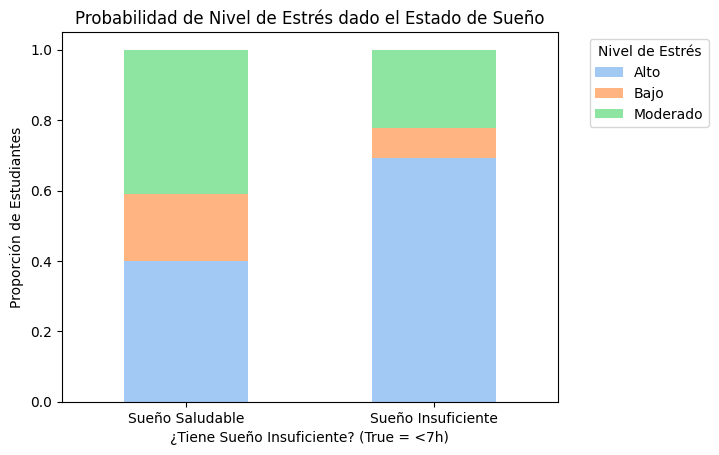

In [13]:
#Visualización de Proporciones
plt.figure(figsize=(10, 6))
# Usamos una tabla de contingencia para ver la relación real
tabla = pd.crosstab(df['Sueno_Insuficiente'], df['Nivel_Estres'], normalize='index')

tabla.plot(kind='bar', stacked=True, color=['#A1C9F4', '#FFB482', '#8DE5A1'])
plt.title('Probabilidad de Nivel de Estrés dado el Estado de Sueño')
plt.xlabel('¿Tiene Sueño Insuficiente? (True = <7h)')
plt.ylabel('Proporción de Estudiantes')
plt.legend(title='Nivel de Estrés', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=[0, 1], labels=['Sueño Saludable', 'Sueño Insuficiente'], rotation=0)
plt.show()

# Lección 3 Distribución de probabilidad

Identificación y Justificación de las Distribuciones

Variable Continua: Horas_Sueno Distribución Seleccionada: Distribución Normal (Z).

Justificación: Las variables biológicas y de comportamiento humano (como el sueño o el peso) tienden a agruparse alrededor de un promedio central, con menos casos en los extremos. Según el Teorema del Límite Central, las sumas de variables independientes tienden a una distribución normal

Variable Discreta: Nivel_Estres (Casos de Estrés Alto)

Distribución Seleccionada: Distribución Binomial.

Justificación: Si tomamos un grupo pequeño de estudiantes (ej. $n=10$), cada uno tiene solo dos estados posibles para este

análisis: tiene "Estrés Alto" Exito (rasgo de interés para el estudio de salud) o "No lo tiene" (fracaso).

# Análisis de la Variable Continua (Distribución Normal)

--- Análisis Distribución Normal (Sueño) ---
Media (μ): 7.50 horas
Desviación Estándar (σ): 1.46 horas
P(Sueño >= 8h): 36.64%


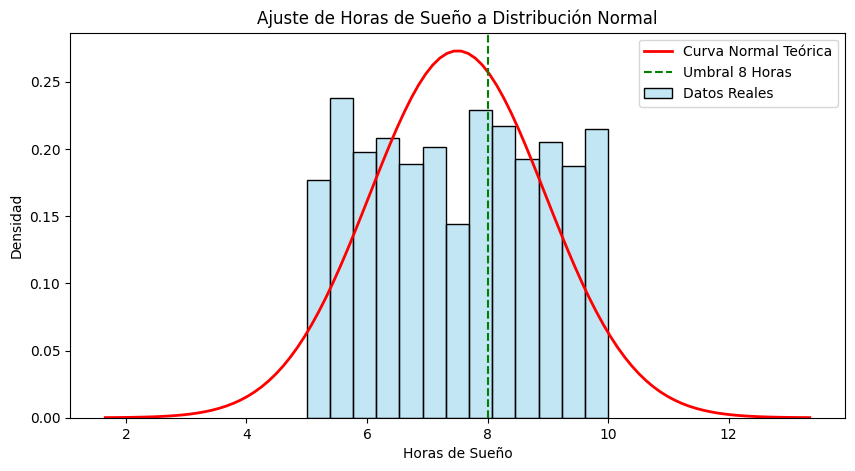

In [25]:
# Parámetros de la población (N=2000)
mu_sueno = df['Horas_Sueno'].mean()
sigma_sueno = df['Horas_Sueno'].std()

# Cálculo de Probabilidad: P(X >= 8) -> ¿Qué tan probable es dormir 8 horas o más?
# Usamos stats.norm.sf (Survival Function) que calcula la probabilidad hacia la derecha
prob_sueno_8h = stats.norm.sf(8, loc=mu_sueno, scale=sigma_sueno)

print(f"--- Análisis Distribución Normal (Sueño) ---")
print(f"Media (μ): {mu_sueno:.2f} horas")
print(f"Desviación Estándar (σ): {sigma_sueno:.2f} horas")
print(f"P(Sueño >= 8h): {prob_sueno_8h:.2%}")

# Graficar la Distribución Normal
plt.figure(figsize=(10, 5))
# Generar puntos para la curva
x = np.linspace(mu_sueno - 4*sigma_sueno, mu_sueno + 4*sigma_sueno, 100)

# Curva teórica usando stats.norm.pdf
plt.plot(x, stats.norm.pdf(x, mu_sueno, sigma_sueno), 'r-', lw=2, label='Curva Normal Teórica')

# Datos reales del dataset
sns.histplot(df['Horas_Sueno'], kde=False, stat="density", color='skyblue', alpha=0.5, label='Datos Reales')

plt.axvline(8, color='green', linestyle='--', label='Umbral 8 Horas')
plt.title('Ajuste de Horas de Sueño a Distribución Normal')
plt.xlabel('Horas de Sueño')
plt.ylabel('Densidad')
plt.legend()
plt.show()

# Análisis de la Variable Discreta (Distribución Binomial)

--- Análisis Distribución Binomial (Estrés en grupo de 10) ---
Probabilidad de éxito (p): 0.5145
P(X >= 5 estudiantes con estrés): 65.82%


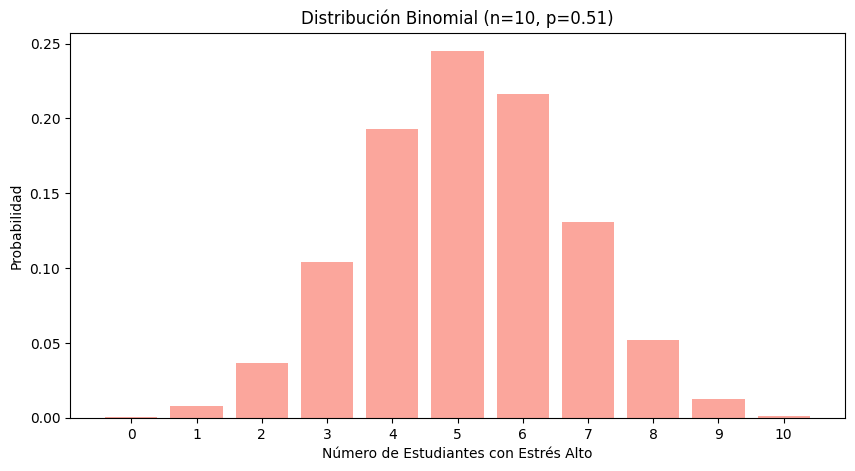

In [26]:
from scipy.stats import binom

# Parámetros
n_ensayos = 10
p_exito = (df['Nivel_Estres'] == 'Alto').mean() # Probabilidad de estrés alto en la población

# Cálculo: P(X >= 5) -> Probabilidad de 5 o más estudiantes con estrés
# 1 - P(X <= 4)
prob_5_o_mas = 1 - binom.cdf(4, n_ensayos, p_exito)

print(f"--- Análisis Distribución Binomial (Estrés en grupo de 10) ---")
print(f"Probabilidad de éxito (p): {p_exito:.4f}")
print(f"P(X >= 5 estudiantes con estrés): {prob_5_o_mas:.2%}")

# Visualización Binomial
x_bin = np.arange(0, n_ensayos + 1)
plt.figure(figsize=(10, 5))
plt.bar(x_bin, binom.pmf(x_bin, n_ensayos, p_exito), color='salmon', alpha=0.7)
plt.title(f'Distribución Binomial (n=10, p={p_exito:.2f})')
plt.xlabel('Número de Estudiantes con Estrés Alto')
plt.ylabel('Probabilidad')
plt.xticks(x_bin)
plt.show()

# Lección 4: Distribución muestral y TLC

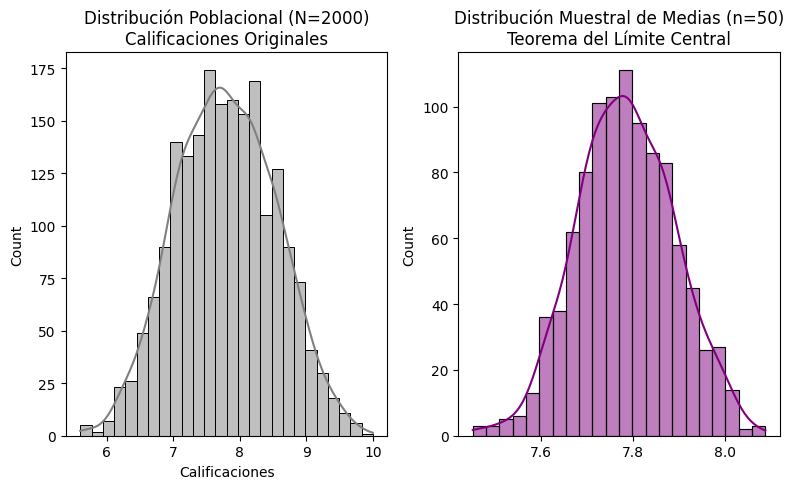

Media de la Población: 7.7898
Media de las Medias Muestrales: 7.7852


In [32]:
# --- TEOREMA DEL LÍMITE CENTRAL ---

# Crear una lista para guardar las medias de muchas muestras
medias_muestrales = []
tamanio_muestra = 50  # n > 30 es lo ideal para el TLC
numero_simulaciones = 1000

# Realizar el muestreo repetitivo
for i in range(numero_simulaciones):
    muestra = df['Calificaciones'].sample(n=tamanio_muestra)
    medias_muestrales.append(muestra.mean())

# Comparar Distribución Poblacional vs Muestral
fig, ax = plt.subplots(1, 2, figsize=(8, 5))

# Gráfico 1: Población total (2000 datos)
sns.histplot(df['Calificaciones'], kde=True, color='gray', ax=ax[0])
ax[0].set_title('Distribución Poblacional (N=2000)\nCalificaciones Originales')

# Gráfico 2: Distribución de las Medias (TLC)
sns.histplot(medias_muestrales, kde=True, color='purple', ax=ax[1])
ax[1].set_title(f'Distribución Muestral de Medias (n={tamanio_muestra})\nTeorema del Límite Central')

plt.tight_layout()
plt.show()

# Verificación estadística
print(f"Media de la Población: {df['Calificaciones'].mean():.4f}")
print(f"Media de las Medias Muestrales: {np.mean(medias_muestrales):.4f}")

Al aplicar el Teorema del **Límite Central** sobre la variable Notass, observamos que la distribución de las medias muestrales (gráfico morado) es harto más estrecha y pareja que la de la población original. Esto nos confirma que el promedio de las muestras le da  al promedio de toda la población, así que podemos hacer inferencias dudas y con toda la seguridad

# Lección 5: Inferencia e intervalos de confianza para la media

Un intervalo de confianza nos da un rango de valores donde es muy probable que se encuentre la media poblacional real ($\mu$).

Nivel de Confianza seleccionado: 95%.Justificación: Es el estándar en investigaciones científicas de salud y ciencias sociales. Significa que si repitiéramos este muestreo 100 veces, en 95 de ellas el promedio real de los estudiantes estaría dentro del rango que calcularemos.

Margen de Error: Es la cantidad que sumamos y restamos a la media muestral, determinada por la variabilidad de los datos (desviación estándar) y el tamaño de la muestra ($N=2000$).

In [34]:
# --- COMPARACIÓN DE NIVELES DE CONFIANZA ---

niveles = [0.90, 0.95, 0.99]
resultados = []

for conf in niveles:
    # Calculamos el intervalo para cada nivel
    intervalo = stats.t.interval(conf, df=n-1, loc=media_muestral, scale=error_estandar)
    ancho = intervalo[1] - intervalo[0]

    resultados.append({
        "Nivel Confianza": f"{conf*100}%",
        "Límite Inferior": round(intervalo[0], 4),
        "Límite Superior": round(intervalo[1], 4),
        "Ancho del Intervalo": round(ancho, 4)
    })

# Mostrar como tabla para el informe
df_confianza = pd.DataFrame(resultados)
print("Comparación de Intervalos para Calificaciones:")
display(df_confianza)

Comparación de Intervalos para Calificaciones:


,Nivel Confianza,Límite Inferior,Límite Superior,Ancho del Intervalo
0,90.0%,7.7623,7.8173,0.0550
1,95.0%,7.7571,7.8226,0.0655
2,99.0%,7.7468,7.8329,0.0861


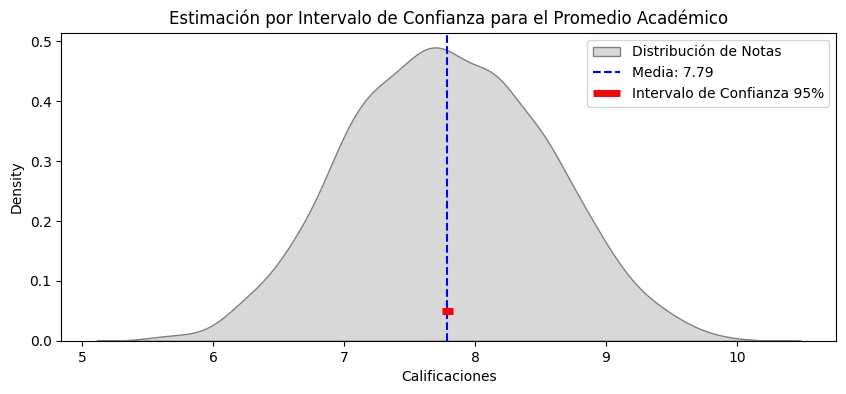

In [35]:
#Visualización del Error y la Estimación
plt.figure(figsize=(10, 4))
sns.kdeplot(data_calif, color='gray', alpha=0.3, fill=True, label='Distribución de Notas')
plt.axvline(media_muestral, color='blue', linestyle='--', label=f'Media: {media_muestral:.2f}')

# Dibujar el intervalo de confianza en la base
plt.hlines(y=0.05, xmin=intervalo[0], xmax=intervalo[1], color='red', linewidth=5, label='Intervalo de Confianza 95%')

plt.title('Estimación por Intervalo de Confianza para el Promedio Académico')
plt.xlabel('Calificaciones')
plt.legend()
plt.show()

Interpretación niveles de confianza

Al realizar la comparación, nos dimos cuenta de una regla de oro en estadística: mientras más seguros queremos estar, más grande tiene que ser el rango.

El intervalo al 90% es el más justo, pero es el más arriesgado porque tiene un 10% de chance de fallarle al valor real.

El de 95% es el que elegimos como oficial porque es el equilibrio; nos da una seguridad sólida sin que el rango se nos dispare.

El de 99% es el más 'conservador'. Para estar casi 100% seguros de no equivocarnos, el intervalo se tiene que estirar un poco más.

Conclusión técnica: Como nuestra muestra es de 2.000 datos, la precisión es tan correcta que incluso el intervalo del 99% sigue siendo súper estrecho. Significa que el Área de Salud puede confiar plenamente en que el promedio de notas que calculamos es el que realmente tienen los estudiantes".

# Lección 6: Test de significancia

**Prueba de Hipótesis**

Pregunta de Investigación: ¿Tienen los estudiantes que duermen bien (7+ horas) mejores notas que los que duermen poco?

Hipótesis Nula H0: No hay diferencia significativa en el promedio de notas entre ambos grupos ($\mu_1 = \mu_2$).

Hipótesis Alternativa H1: El promedio de notas de quienes duermen bien es mayor al de quienes no lo hacen ($\mu_1 > \mu_2$).
Nivel de Significancia ($\alpha$): 0.05 (5%). **Este es el umbral para rechazar la inocencia de la hipótesis nula.**

In [37]:
#Ejecución del Test de Hipótesis Prueba t de Student

# --- TEST DE SIGNIFICANCIA ---

# Crear los dos grupos para comparar
grupo_duerme_bien = df[df['Horas_Sueno'] >= 7]['Calificaciones']
grupo_duerme_poco = df[df['Horas_Sueno'] < 7]['Calificaciones']

# Realizar la prueba t de Student para muestras independientes
t_stat, p_valor = stats.ttest_ind(grupo_duerme_bien, grupo_duerme_poco, alternative='greater')

print(f"--- Resultados del Test de Hipótesis ---")
print(f"Media Grupo Sueño Saludable: {grupo_duerme_bien.mean():.4f}")
print(f"Media Grupo Sueño Insuficiente: {grupo_duerme_poco.mean():.4f}")
print(f"----------------------------------------")
print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor-p (p-value): {p_valor:.10f}") # Mostramos muchos decimales por si es muy chico

# Toma de decisión
alpha = 0.05
if p_valor < alpha:
    print("\n DECISIÓN: Rechazamos la Hipótesis Nula (H0).")
    print("Hay evidencia estadística suficiente para decir que dormir bien mejora las notas.")
else:
    print("\nDECISIÓN: No se rechaza la Hipótesis Nula (H0).")
    print("No hay diferencia significativa entre los grupos.")

--- Resultados del Test de Hipótesis ---
Media Grupo Sueño Saludable: 7.7987
Media Grupo Sueño Insuficiente: 7.7759
----------------------------------------
Estadístico t: 0.6663
Valor-p (p-value): 0.2526628724

DECISIÓN: No se rechaza la Hipótesis Nula (H0).
No hay diferencia significativa entre los grupos.


**Explicación de Errores (Tipo I y II)**

Error Tipo I (Falso Positivo): Sería concluir que el sueño mejora las notas cuando en realidad diferencia. Esto haría que la universidad gaste  en campañas de sueño que no servirán para subir el rendimiento.

Error Tipo II (Falso Negativo): Sería decir que el sueño no importa, cuando en verdad sí es clave. Aquí el riesgo es que la universidad ignore un problema real de salud mental y física de los alumnos.

# Conclusión Final del Proyecto

Después de analizar a los 2.000 datos

El test nos dio un $p\text{-valor}$ de $0.25$, que es  más que el $0.05$ que fijamos.

 ¿Qué nos dice esto? Que aunque los estudiantes que duermen más tienen una décima más de promedio ($7.80$ vs $7.78$), esa diferencia es tan pequeña que perfectamente puede ser coincidencia.Por lo tanto, no podemos asegurar científicamente que dormir menos afecte las notas en este grupo de estudiantes. Para el Área de Salud, esto significa que hay otros factores (como las horas de estudio o el estrés) que quizás pesan mucho más que el puro sueño".